In [1]:
import pandas as pd
df = pd.read_csv('d:/workspace/Python2/data/ozone/ozone(notnull).csv')
df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.00000,190.000000,7.4,67,5,1
1,36.00000,118.000000,8.0,72,5,2
2,12.00000,149.000000,12.6,74,5,3
3,18.00000,313.000000,11.5,62,5,4
4,42.12931,185.931507,14.3,56,5,5


In [2]:
X = df[['Solar.R', 'Wind', 'Temp']]
y = df['Ozone']

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [4]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(8, input_shape=(len(X_train.columns),), activation='relu', name='input')) # 레이어에 이름추가
model.add(Dense(4, activation='relu',name='hidden-1')) # 레이어에 이름추가
model.add(Dense(2, activation='relu'))
model.add(Dense(1, name='output'))
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
model.summary()
'''
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 input (Dense)               (None, 8)                 32        
 입력 노드수 - 변수의수        출력 노드수 - 8개         파라미터수 - 32개
 
 hidden-1 (Dense)            (None, 4)                 36        
                                                                 
 dense (Dense)               (None, 2)                 10        
                                                                 
 output (Dense)              (None, 1)                 3         
                                                                 
=================================================================
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________
'''

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 8)                 32        
                                                                 
 hidden-1 (Dense)            (None, 4)                 36        
                                                                 
 dense (Dense)               (None, 2)                 10        
                                                                 
 output (Dense)              (None, 1)                 3         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


'\nModel: "sequential"\n_________________________________________________________________\n Layer (type)                Output Shape              Param #   \n=================================================================\n input (Dense)               (None, 8)                 32        \n 입력 노드수 - 변수의수        출력 노드수 - 8개         파라미터수 - 32개\n \n hidden-1 (Dense)            (None, 4)                 36        \n                                                                 \n dense (Dense)               (None, 2)                 10        \n                                                                 \n output (Dense)              (None, 1)                 3         \n                                                                 \n=================================================================\nTotal params: 81\nTrainable params: 81\nNon-trainable params: 0\n_________________________________________________________________\n'

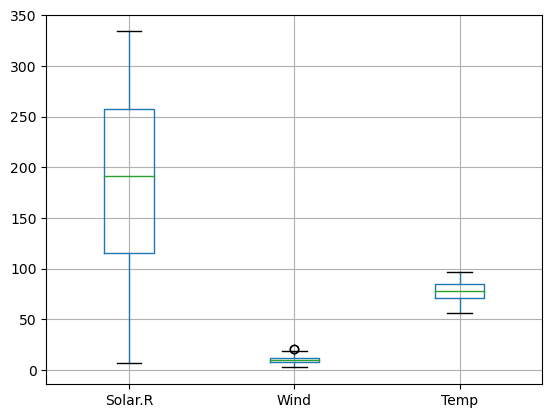

In [5]:
X_train.boxplot() # 스케일링 전
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
# fit 패턴분석
X_train_scaled = scaler.transform(X_train)
# transform 변환
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

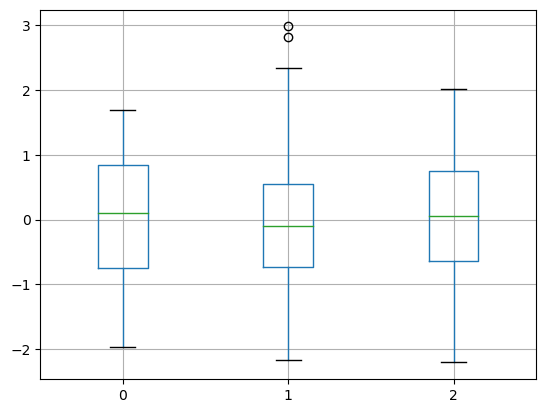

In [6]:
import matplotlib.pyplot as plt
X_train_scaled.boxplot() # 스케일링 후
plt.show()

In [7]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=50)
hist=model.fit(X_train_scaled,y_train,epochs=500, validation_split=0.2,callbacks=[early_stopping]) # 학습과정 저장

Epoch 1/500
4/4 [==============================] - 1s 60ms/step - loss: 2714.1755 - mse: 2714.1755 - mae: 41.9351 - val_loss: 2000.5792 - val_mse: 2000.5792 - val_mae: 38.1435
Epoch 2/500
4/4 [==============================] - 0s 9ms/step - loss: 2713.6685 - mse: 2713.6685 - mae: 41.9298 - val_loss: 2000.1494 - val_mse: 2000.1494 - val_mae: 38.1383
Epoch 3/500
4/4 [==============================] - 0s 9ms/step - loss: 2713.1731 - mse: 2713.1731 - mae: 41.9246 - val_loss: 1999.7098 - val_mse: 1999.7098 - val_mae: 38.1329
Epoch 4/500
4/4 [==============================] - 0s 9ms/step - loss: 2712.6885 - mse: 2712.6885 - mae: 41.9195 - val_loss: 1999.2501 - val_mse: 1999.2501 - val_mae: 38.1271
Epoch 5/500
4/4 [==============================] - 0s 9ms/step - loss: 2712.1882 - mse: 2712.1882 - mae: 41.9141 - val_loss: 1998.7769 - val_mse: 1998.7769 - val_mae: 38.1212
Epoch 6/500
4/4 [==============================] - 0s 9ms/step - loss: 2711.6160 - mse: 2711.6160 - mae: 41.9083 - val_loss:

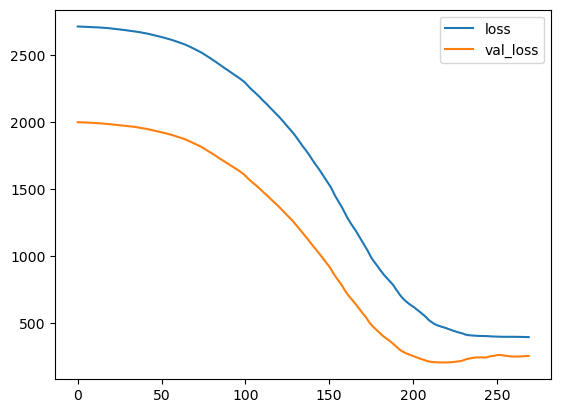

In [8]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

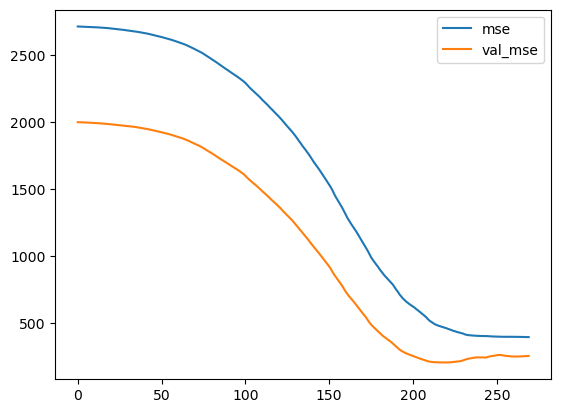

In [9]:
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])
plt.legend(['mse','val_mse'])
plt.show()

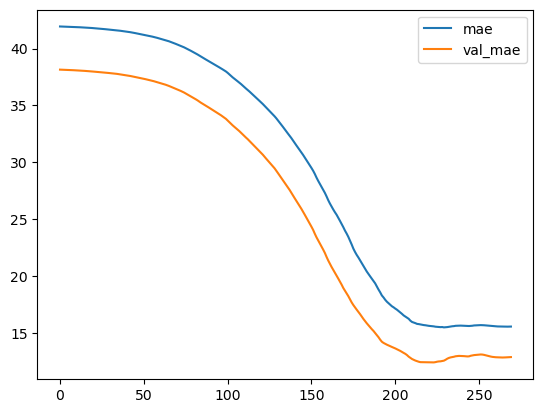

In [10]:
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.legend(['mae','val_mae'])
plt.show()

In [11]:
scores=model.evaluate(X_train_scaled,y_train)
print(scores)
scores=model.evaluate(X_test_scaled,y_test)
print(scores)

4/4 [==============================] - 0s 2ms/step - loss: 369.1474 - mse: 369.1474 - mae: 15.0151
[369.1473693847656, 369.1473693847656, 15.015138626098633]
1/1 [==============================] - 0s 24ms/step - loss: 265.3344 - mse: 265.3344 - mae: 12.6427
[265.3343811035156, 265.3343811035156, 12.642721176147461]


In [12]:
from sklearn.metrics import r2_score
pred=model.predict(X_test_scaled)
r2_score(y_test, pred)

1/1 [==============================] - 0s 77ms/step


0.5416534005709377